In [88]:
import pandas as pd
import os

def combine_and_clean(directory_path = '15percent', prefix = 'congress', suffix = '.vis'):
    all_files = os.listdir(directory_path)

    # select only the files that end with given suffix
    selected_files = [f for f in all_files if f.startswith(prefix) and f.endswith(suffix)]

    # Read each file into a dataframe and store them in a dictionary with file names as keys
    dfs = {f: pd.read_csv(os.path.join(directory_path, f), header=None) for f in selected_files}

    # Concatenate all dataframes into one, using file names as column headers
    combined_df = pd.concat(dfs, axis=1)

    # only keep the first 30 rows
    combined_df = combined_df.iloc[:30]

    # To have only file names as top-level column headers (removing multi-level indexing)
    combined_df.columns = [col[0] for col in combined_df.columns]

    # Create a dictionary to map old column names to new names
    column_mapping = {
        f'{prefix}.wagner.node2vec.vis': 'n2v',
        f'{prefix}.wagner.nodesim.vis': 'nodesim',
        f'{prefix}.wagner.fairwalk.vis': 'fairwalk',
        f'{prefix}.wagner.crosswalk.vis': 'crosswalk',
        f'{prefix}.wagner.ppr.vis': 'ppr',
        f'{prefix}.wagner.nlocal_fair_ppr.vis': 'n-ppr',
        f'{prefix}.wagner.plocal_fair_ppr.vis': 'p-ppr',
        f'{prefix}.wagner.ulocal_fair_ppr.vis': 'u-ppr',
        f'{prefix}.wagner.SimpleWalk_maj_only_reset_0.vis': 'minwalk'
    }

    # Filter the DataFrame to keep only the columns listed in the dictionary
    combined_df_clean = combined_df[list(column_mapping.keys())]

    # Rename the columns using the dictionary
    combined_df_clean = combined_df_clean.rename(columns=column_mapping)

    # replace any zeros with mean of the column
    combined_df_clean = combined_df_clean.replace(0, combined_df_clean.mean())

    # Now, combined_df contains the desired columns in the specified order with the new names
    return combined_df_clean

In [89]:
congress_15_vis = combine_and_clean(directory_path='15percent', prefix = 'congress', suffix = '.vis')
email_eu_15_vis = combine_and_clean(directory_path='15percent', prefix = 'email_eu', suffix = '.vis')
facebook_15_vis = combine_and_clean(directory_path='15percent', prefix = 'facebook', suffix = '.vis')
wiki_vote_15_vis = combine_and_clean(directory_path='15percent', prefix = 'wiki_vote', suffix = '.vis')
lastfm_15_vis = combine_and_clean(directory_path='15percent', prefix = 'lastfm', suffix = '.vis')
deezer_15_vis = combine_and_clean(directory_path='15percent', prefix = 'lastfm', suffix = '.vis')
# deezer_15_vis = combine_and_clean(directory_path='15percent', prefix = 'deezer', suffix = '.vis')

print(facebook_15_vis.head())

        n2v   nodesim  fairwalk  crosswalk       ppr     n-ppr     p-ppr  \
0  0.089330  0.089330  0.089330   0.089330  0.089330  0.089330  0.089330   
1  0.086849  0.089330  0.086849   0.295285  0.071960  0.069479  0.084367   
2  0.081886  0.086849  0.086849   0.277916  0.059553  0.059553  0.086849   
3  0.084367  0.086849  0.076923   0.263027  0.057072  0.052109  0.069479   
4  0.074442  0.086849  0.071960   0.263027  0.044665  0.044665  0.076923   

      u-ppr   minwalk  
0  0.089330  0.089330  
1  0.084367  0.533499  
2  0.084367  0.521092  
3  0.086849  0.481390  
4  0.084367  0.491315  


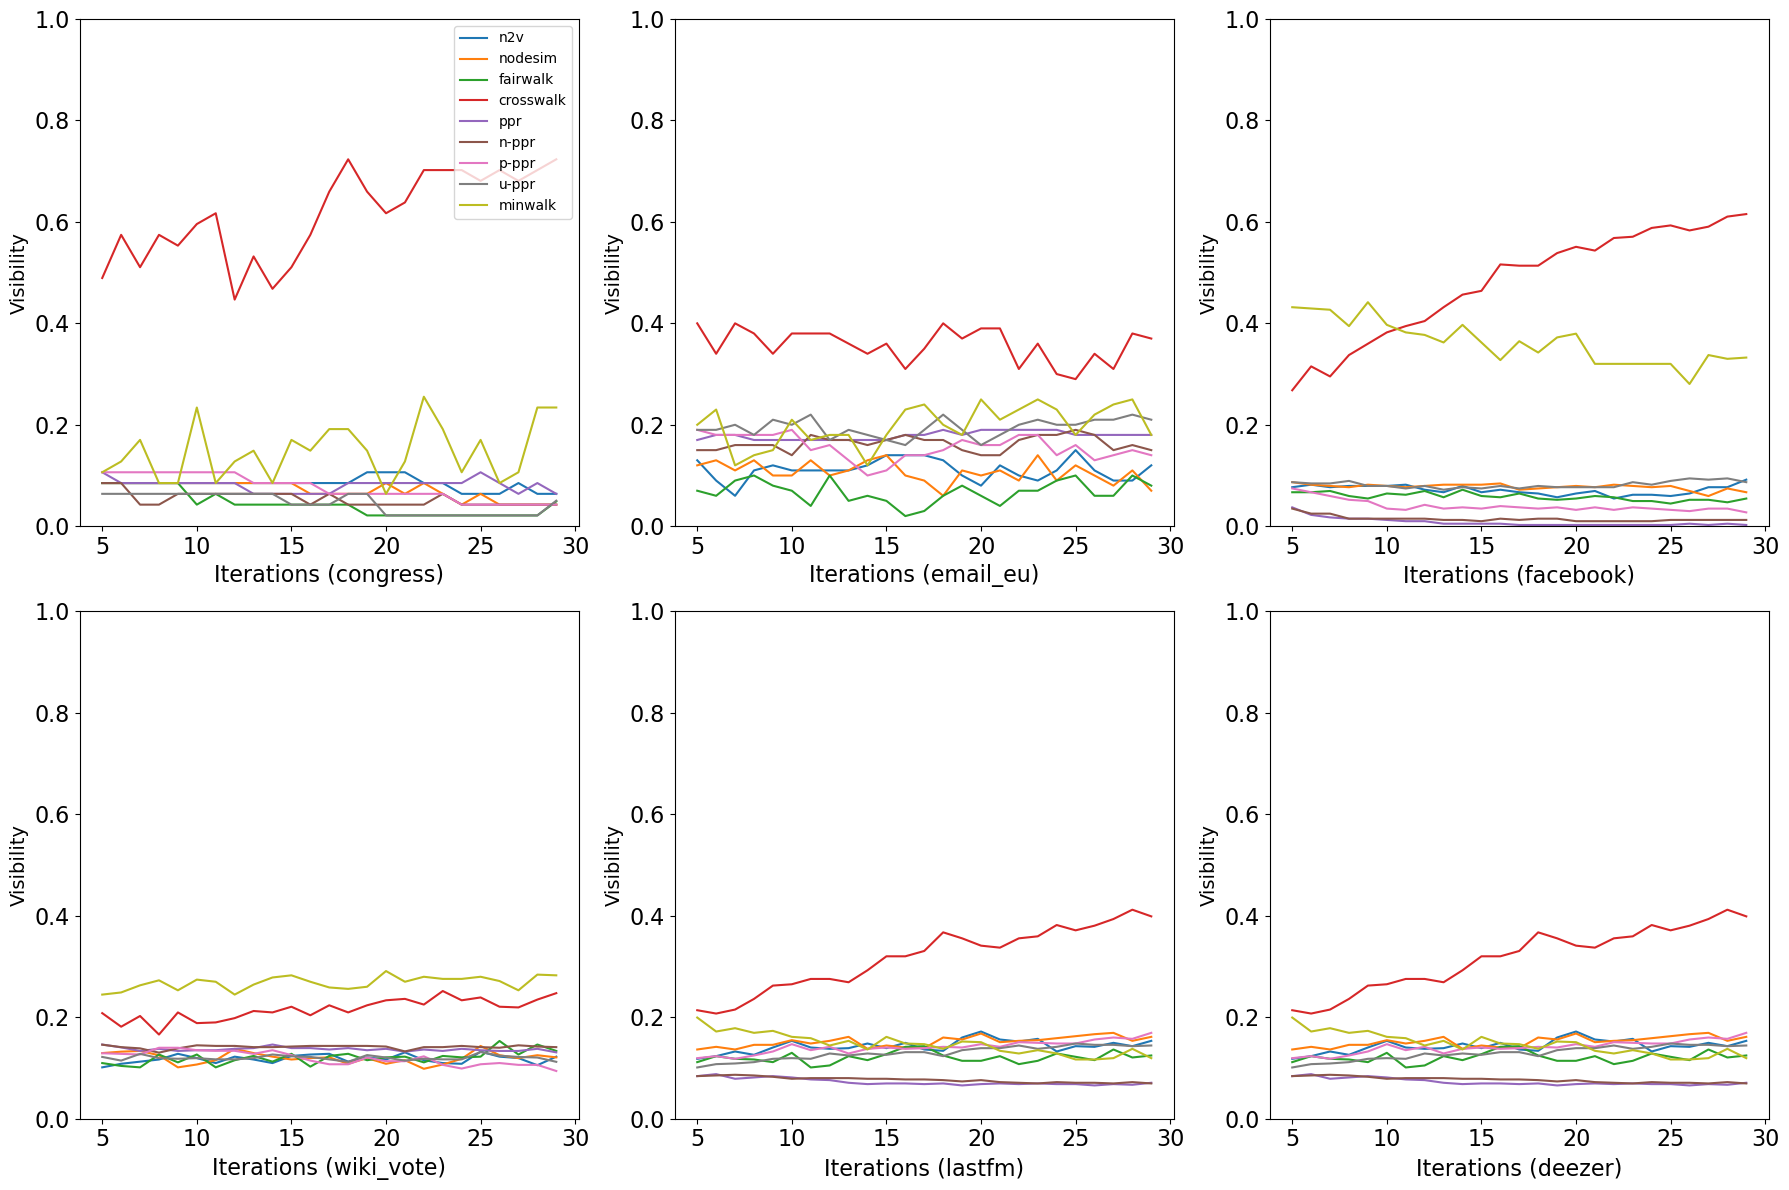

In [98]:
import matplotlib.pyplot as plt

# Assuming you have six dataframes: congress_15_vis, email_eu_15_vis, facebook_15_vis, 
# wiki_vote_15_vis, lastfm_15_vis, deezer_15_vis

dataframes = [congress_15_vis, email_eu_15_vis, facebook_15_vis, 
              wiki_vote_15_vis, lastfm_15_vis, deezer_15_vis]

# Dataset names in order
dataset_names = ['congress', 'email_eu', 'facebook', 'wiki_vote', 'lastfm', 'deezer']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot each dataframe on a separate subplot
for i, df in enumerate(dataframes):
    row = i // 3
    col = i % 3
    
    for column in df.columns:
        axes[row, col].plot(df.index[5:], df[column][5:], label=column)
    
    # Set custom x-axis label with dataset name in parentheses
    axes[row, col].set_xlabel(f'Iterations ({dataset_names[i]})', fontsize=16)
    axes[row, col].set_ylabel('Visibility', fontsize=14)
    
    # Show legend only in the first chart
    if i == 0:
        axes[row, col].legend(loc='upper right')  # Place the legend inside the first chart
    
    # Remove titles for all charts
    axes[row, col].set_title('')
    
    # Increase font size of tick labels on x and y axes
    axes[row, col].tick_params(axis='both', labelsize=16)
    
    # Set y-axis limits to [0, 1.0]
    axes[row, col].set_ylim([0, 1.0])

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('vis_15.pdf', format='pdf')

# Show the plots
plt.show()
